# I. Introduction

##### RMT-032-Group2

Roles of Group 2 :
- Ignatius Kurniawan Eko Wibowo: Data Scientist
- Iqbal Saputra : Data Analyst
- Bagus Adji Kusuma : Data Engineer

** Proyek kami menggunakan teknik regresi untuk memperkirakan harga rumah 
di ibu kota baru Indonesia (IKN) dan daerah sekitarnya. Dengan mengumpulkan dan 
menganalisis data real estate atau bertipe rumah dari Brighton.co.id, model kami memberikan wawasan 
berbasis data yang tepat untuk membantu investor properti, pembuat kebijakan, 
dan perencana kota dalam mengambil keputusan yang baik. Pendekatan inovatif 
ini menjamin prediksi nilai properti yang akurat, mendukung pertumbuhan dan 
pembangunan yang berkelanjutan di kawasan yang sedang berkembang ini. **

# II. Import Libraries

In [170]:
# Import yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# III. Data Loading

In [171]:
df1 = pd.read_csv('samarinda.csv')
df2 = pd.read_csv('balikpapan.csv')
df1.head(5)

,Price,Lokasi,Tipe,Group,Luas Bangunan,Luas Tanah,Sertifikat,Furnish
0,"Rp 2,6 Miliar","Kalimantan Timur, Samarinda, Samarinda Utara",Rumah,Secondary,172 m2,210 m2,SHM,Semi-furnished
1,Rp 875 Juta,"Kalimantan Timur, Samarinda, Samarinda Utara",Rumah,Secondary,57 m2,200 m2,SHM,-
2,Rp 600 Juta,"Kalimantan Timur, Samarinda, Samarinda Ilir",Rumah,Secondary,115 m2,235 m2,SHM,-
3,"Rp 1,6 Miliar","Kalimantan Timur, Samarinda, Samarinda Ulu",Rumah,Secondary,220 m2,135 m2,SHM,-
4,"Rp 2,2 Miliar","Kalimantan Timur, Samarinda, Samarinda Kota",Rumah,Secondary,140 m2,184 m2,SHM,Non-furnished


In [172]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Price          377 non-null    object
 1   Lokasi         377 non-null    object
 2   Tipe           377 non-null    object
 3   Group          377 non-null    object
 4   Luas Bangunan  377 non-null    object
 5   Luas Tanah     377 non-null    object
 6   Sertifikat     377 non-null    object
 7   Furnish        377 non-null    object
dtypes: object(8)
memory usage: 23.7+ KB


In [173]:
missing_values = df1.isnull().sum()
print("\nJumlah nilai yang hilang di setiap kolom:")
print(missing_values)


Jumlah nilai yang hilang di setiap kolom:
Price            0
Lokasi           0
Tipe             0
Group            0
Luas Bangunan    0
Luas Tanah       0
Sertifikat       0
Furnish          0
dtype: int64


- Insight :

Tidak ditemukan data yang hilang dan akan di lanjutkan ke proses yang selanjutnya

In [174]:
# Mengecek jumlah baris yang duplikat
duplicates = df1.duplicated().sum()
print(f"Jumlah baris yang duplikat: {duplicates}")

Jumlah baris yang duplikat: 13


In [175]:
duplicate_rows = df1[df1.duplicated()]
print("Duplikasi ditemukan:")
duplicate_rows

Duplikasi ditemukan:


,Price,Lokasi,Tipe,Group,Luas Bangunan,Luas Tanah,Sertifikat,Furnish
88,"Rp 2,08 Miliar","Kalimantan Timur, Samarinda, Sungai Pinang",Rumah,Primary,93 m2,140 m2,HGB,Non-furnished
138,"Rp 4,9 Miliar","Kalimantan Timur, Samarinda, Samarinda Utara",Rumah,Secondary,450 m2,300 m2,SHM,-
140,"Rp 2,08 Miliar","Kalimantan Timur, Samarinda, Samarinda Utara",Rumah,Primary,93 m2,140 m2,HGB,Non-furnished
151,"Rp 2,08 Miliar","Kalimantan Timur, Samarinda, Samarinda Utara",Rumah,Primary,93 m2,140 m2,HGB,Non-furnished
179,"Rp 2,08 Miliar","Kalimantan Timur, Samarinda, Samarinda Utara",Rumah,Primary,93 m2,140 m2,HGB,Non-furnished
199,"Rp 1,57 Miliar","Kalimantan Timur, Samarinda, Loa Janan Ilir",Rumah,Primary,110 m2,215 m2,HGB,Non-furnished
231,"Rp 704,35 Juta","Kalimantan Timur, Samarinda, Loa Janan Ilir",Rumah,-,38 m2,108 m2,HGB,-
246,"Rp 1,9 Miliar","Kalimantan Timur, Samarinda, Sungai Pinang",Rumah,-,96 m2,126 m2,HGB,-
247,"Rp 2,76 Miliar","Kalimantan Timur, Samarinda, Sungai Pinang",Rumah,-,96 m2,147 m2,HGB,-
258,"Rp 2,08 Miliar","Kalimantan Timur, Samarinda, Sungai Pinang",Rumah,Primary,93 m2,140 m2,HGB,Non-furnished


- Insight:

Dari hasil duplikat yang ditampilkan 13 yang duplicated ini menjadi pertimbangan apakah data yang duplikat akan di drop atau tidak, karena mungkin ada kolerasi dari setiap kolom yang akan di lakukan pemodelan nantinya.

### A. Clean Data

#### A.1 Samarinda

In [176]:
# # Mengganti koma dengan titik di kolom Price
# df1['Price'] = df1['Price'].str.replace(',', '.')

# # Mengganti tanda baca dan simbol di kolom Price agar bisa diubah menjadi numerik
# df1['Price'] = df1['Price'].replace({'Rp ': '', ' Miliar': '000000000', ' Juta': ''}, regex=True)
# df1['Price'] = df1['Price'].str.replace('.', '', regex=False).astype(float)

# Menghapus duplikasi
#df1 = df1.drop_duplicates()

In [177]:
# Menghapus "Kalimantan Timur," dari kolom Lokasi
df1['Lokasi'] = df1['Lokasi'].str.replace('Kalimantan Timur,', '', regex=False)

#####

In [178]:
import re

def clean_price_to_rupiah(price):
    # Ekstrak semua angka dan identifikasi unit (Juta/Miliar)
    matches = re.findall(r'(\d+(?:,\d+)?)\s*(Juta|Miliar)?', price)
    total = 0
    for value, unit in matches:
        # Konversi nilai ke float, ganti koma dengan titik
        num = float(value.replace(',', '.'))
        if unit == 'Miliar':
            total += num * 1e9  # Konversi Miliar ke Rupiah
        elif unit == 'Juta':
            total += num * 1e6  # Konversi Juta ke Rupiah
        else:
            total += num  # Asumsikan sudah dalam Rupiah jika tidak ada unit

    return int(total)  # Kembalikan nilai sebagai integer Rupiah

# Aplikasikan fungsi ke kolom Price
df1['Price'] = df1['Price'].apply(clean_price_to_rupiah)

####

In [179]:
# Mengubah tipe data kolom numerik
df1['Luas Bangunan'] = df1['Luas Bangunan'].str.replace(' m2', '').astype(float)
df1['Luas Tanah'] = df1['Luas Tanah'].str.replace(' m2', '').astype(float)

In [180]:
# Definisikan kolom yang akan dibersihkan
columns_to_clean = ['Furnish', 'Group', 'Sertifikat']

# Definisikan nilai pengganti
replacement = {
    'Furnish': '',
    'Group': '',
    'Sertifikat': ''
}

# Aplikasikan penggantian langsung
for col in columns_to_clean:
    df1[col] = df1[col].replace('-', replacement[col])

In [181]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          377 non-null    int64  
 1   Lokasi         377 non-null    object 
 2   Tipe           377 non-null    object 
 3   Group          377 non-null    object 
 4   Luas Bangunan  377 non-null    float64
 5   Luas Tanah     377 non-null    float64
 6   Sertifikat     377 non-null    object 
 7   Furnish        377 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 23.7+ KB


In [182]:
df1.head(30)

,Price,Lokasi,Tipe,Group,Luas Bangunan,Luas Tanah,Sertifikat,Furnish
0,2600000000,"Samarinda, Samarinda Utara",Rumah,Secondary,172.0,210.0,SHM,Semi-furnished
1,875000000,"Samarinda, Samarinda Utara",Rumah,Secondary,57.0,200.0,SHM,
2,600000000,"Samarinda, Samarinda Ilir",Rumah,Secondary,115.0,235.0,SHM,
3,1600000000,"Samarinda, Samarinda Ulu",Rumah,Secondary,220.0,135.0,SHM,
4,2200000000,"Samarinda, Samarinda Kota",Rumah,Secondary,140.0,184.0,SHM,Non-furnished
5,445000000,"Samarinda, Samarinda Seberang",Rumah,Secondary,36.0,91.0,HGB,
6,459000000,"Samarinda, Samarinda Seberang",Rumah,Primary,40.0,91.0,HGB,
7,2500000000,"Samarinda, Samarinda Kota",Rumah,Secondary,180.0,285.0,HGB,Non-furnished
8,3080000000,"Samarinda, Samarinda Seberang",Rumah,Secondary,225.0,276.0,SHM,Semi-furnished
9,1950000000,"Samarinda, Sungai Kunjang",Rumah,Secondary,186.0,292.0,SHM,Semi-furnished


- Insight:

Data sudah clean dan bisa lanjut ke proses yang selanjutnya pada kota balikpapan untuk dilakukan cleaning dataset

In [183]:
#Mengubah dataframe samarinda menjadi csv
df1.to_csv('samarinda_clean.csv', index=False)

#### A.2 Balikpapan

In [184]:
df2.head(5)

,Price,Lokasi,Tipe,Group,Luas Bangunan,Luas Tanah,Sertifikat,Furnish
0,"Rp 1,2 Miliar","Kalimantan Timur, Balikpapan, Balikpapan Selatan",Rumah,Secondary,110 m2,157 m2,SHM,Fully-furnished
1,Rp 17 Miliar,"Kalimantan Timur, Balikpapan, Balikpapan Selatan",Rumah,Secondary,850 m2,1250 m2,SHM,Fully-furnished
2,"Rp 4,5 Miliar","Kalimantan Timur, Balikpapan, Balikpapan Selatan",Rumah,-,580 m2,1034 m2,SHM,-
3,"Rp 3,3 Miliar","Kalimantan Timur, Balikpapan, Balikpapan Selatan",Rumah,Secondary,80 m2,380 m2,SHM,Fully-furnished
4,"Rp 5,8 Miliar","Kalimantan Timur, Balikpapan, Balikpapan Selatan",Rumah,Secondary,480 m2,260 m2,SHM,Fully-furnished


In [185]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Price          403 non-null    object
 1   Lokasi         403 non-null    object
 2   Tipe           403 non-null    object
 3   Group          403 non-null    object
 4   Luas Bangunan  403 non-null    object
 5   Luas Tanah     403 non-null    object
 6   Sertifikat     403 non-null    object
 7   Furnish        403 non-null    object
dtypes: object(8)
memory usage: 25.3+ KB


In [186]:
missing_values = df2.isnull().sum()
print("\nJumlah nilai yang hilang di setiap kolom:")
print(missing_values)


Jumlah nilai yang hilang di setiap kolom:
Price            0
Lokasi           0
Tipe             0
Group            0
Luas Bangunan    0
Luas Tanah       0
Sertifikat       0
Furnish          0
dtype: int64


- Insight :

Tidak ditemukan data yang hilang dan akan di lanjutkan ke proses yang selanjutnya

In [187]:
# Mengecek jumlah baris yang duplikat
duplicates = df2.duplicated().sum()
print(f"Jumlah baris yang duplikat: {duplicates}")

Jumlah baris yang duplikat: 1


In [188]:
duplicate_rows = df2[df2.duplicated()]
print("Duplikasi ditemukan:")
duplicate_rows

Duplikasi ditemukan:


,Price,Lokasi,Tipe,Group,Luas Bangunan,Luas Tanah,Sertifikat,Furnish
282,"Rp 7,7 Miliar","Kalimantan Timur, Balikpapan, Balikpapan Selatan",Rumah,Secondary,341 m2,558 m2,SHM,Semi-furnished


- Insight:

Dari hasil duplikat yang ditampilkan hanya 1 yang duplicated ini menjadi pertimbangan apakah data yang duplikat akan di drop atau tidak, karena mungkin ada kolerasi dari setiap kolom yang akan di lakukan pemodelan nantinya.

In [189]:
# Menghapus duplikasi
#df2.drop_duplicates()

In [190]:
# Menghapus "Kalimantan Timur," dari kolom Lokasi
df2['Lokasi'] = df2['Lokasi'].str.replace('Kalimantan Timur,', '', regex=False)

#####

In [191]:
def clean_price_to_rupiah(price):
    # Ekstrak semua angka dan identifikasi unit (Juta/Miliar)
    matches = re.findall(r'(\d+(?:,\d+)?)\s*(Juta|Miliar)?', price)
    total = 0
    for value, unit in matches:
        # Konversi nilai ke float, ganti koma dengan titik
        num = float(value.replace(',', '.'))
        if unit == 'Miliar':
            total += num * 1e9  # Konversi Miliar ke Rupiah
        elif unit == 'Juta':
            total += num * 1e6  # Konversi Juta ke Rupiah
        else:
            total += num  # Asumsikan sudah dalam Rupiah jika tidak ada unit

    return int(total)  # Kembalikan nilai sebagai integer Rupiah

# Aplikasikan fungsi ke kolom Price
df2['Price'] = df2['Price'].apply(clean_price_to_rupiah)

####

In [192]:
# Mengubah tipe data kolom numerik
df2['Luas Bangunan'] = df2['Luas Bangunan'].str.replace(' m2', '').astype(float)
df2['Luas Tanah'] = df2['Luas Tanah'].str.replace(' m2', '').astype(float)

In [193]:
# Definisikan kolom yang akan dibersihkan
columns_to_clean = ['Furnish', 'Group', 'Sertifikat']

# Definisikan nilai pengganti
replacement = {
    'Furnish': '',
    'Group': '',
    'Sertifikat': ''
}

# Aplikasikan penggantian langsung
for col in columns_to_clean:
    df2[col] = df2[col].replace('-', replacement[col])

In [194]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          403 non-null    int64  
 1   Lokasi         403 non-null    object 
 2   Tipe           403 non-null    object 
 3   Group          403 non-null    object 
 4   Luas Bangunan  403 non-null    float64
 5   Luas Tanah     403 non-null    float64
 6   Sertifikat     403 non-null    object 
 7   Furnish        403 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 25.3+ KB


In [195]:
df2.head(10)

,Price,Lokasi,Tipe,Group,Luas Bangunan,Luas Tanah,Sertifikat,Furnish
0,1200000000,"Balikpapan, Balikpapan Selatan",Rumah,Secondary,110.0,157.0,SHM,Fully-furnished
1,17000000000,"Balikpapan, Balikpapan Selatan",Rumah,Secondary,850.0,1250.0,SHM,Fully-furnished
2,4500000000,"Balikpapan, Balikpapan Selatan",Rumah,,580.0,1034.0,SHM,
3,3300000000,"Balikpapan, Balikpapan Selatan",Rumah,Secondary,80.0,380.0,SHM,Fully-furnished
4,5800000000,"Balikpapan, Balikpapan Selatan",Rumah,Secondary,480.0,260.0,SHM,Fully-furnished
5,4000000000,"Balikpapan, Balikpapan Selatan",Rumah,Secondary,340.0,230.0,SHM,Semi-furnished
6,2075000000,"Balikpapan, Balikpapan Selatan",Rumah,Secondary,148.0,168.0,SHM,Fully-furnished
7,1500000000,"Balikpapan, Balikpapan Selatan",Rumah,Secondary,72.0,102.0,SHM,Semi-furnished
8,12220000000,"Balikpapan, Balikpapan Selatan",Rumah,Secondary,350.0,570.0,SHM,Fully-furnished
9,950000000,"Balikpapan, Balikpapan Selatan",Rumah,Secondary,48.0,112.0,SHM,Non-furnished


- Insight:

Kedua Dataset sudah clean dan bisa dilanjutkan ke Exploratory Data Analysis untuk di analisa lebih lanjut

In [196]:
#Mengubah dataframe samarinda menjadi csv
df2.to_csv('balikpapan_clean.csv', index=False)

# IV. Exploratory Data Analysis (EDA)

In [197]:
df11 = pd.read_csv('samarinda_clean.csv')
df22 = pd.read_csv('balikpapan_clean.csv')

#### A.1 Analys samarinda_clean

In [198]:
# Melihat statistik deskriptif dari variabel-variabel numerik
df11.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,377.0,2.305871e+09,2.962853e+09,50000001.0,950000000.0,1.550000e+09,2.590000e+09,2.800000e+10
Luas Bangunan,377.0,1.740470e+02,1.866415e+02,0.0,80.0,1.240000e+02,2.010000e+02,1.930000e+03
Luas Tanah,377.0,2.757241e+02,9.427976e+02,10.0,120.0,1.630000e+02,2.430000e+02,1.794900e+04


In [213]:
df11.Group.unique().tolist()

['Secondary', 'Primary', nan]

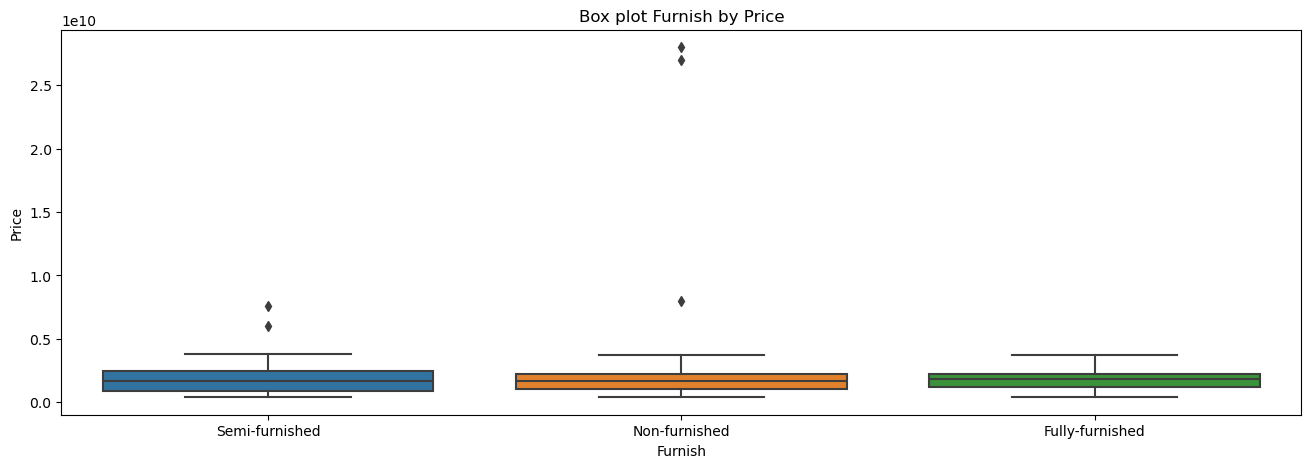

In [202]:
plt.figure(figsize=(16,5))
sns.boxplot(x='Furnish', y='Price', data=df11)
plt.title('Box plot Furnish by Price')
plt.show()

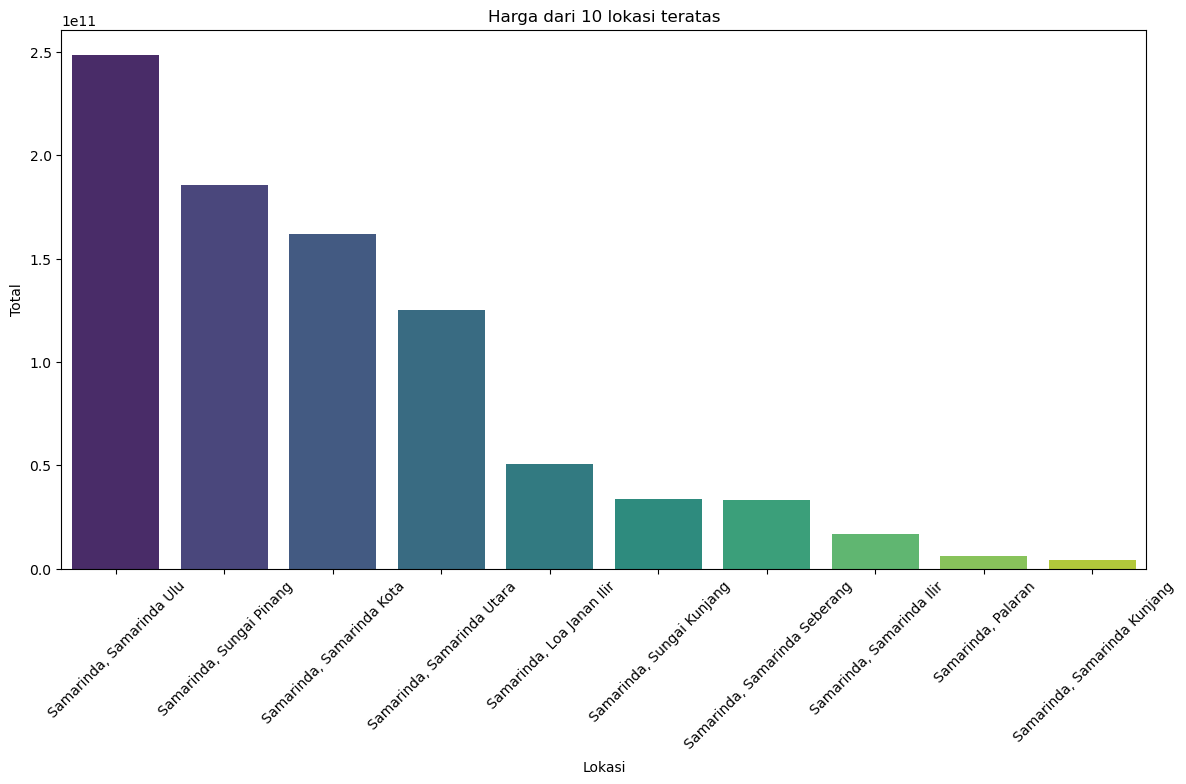

In [227]:
# Mengelompokkan data berdasarkan product_id dan menghitung total penjualan
price_lokasi = df11.groupby('Lokasi')['Price'].sum().reset_index()

# Mengurutkan produk berdasarkan total penjualan dan memilih 10 produk teratas
top_10_lokasi = price_lokasi.sort_values(by='Price', ascending=False).head(10)

# Membuat diagram batang untuk total penjualan 10 produk teratas
plt.figure(figsize=(14, 7))
sns.barplot(x='Lokasi', y='Price', data=top_10_lokasi, palette='viridis')
plt.title('Harga dari 10 lokasi teratas')
plt.xlabel('Lokasi')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.show()

In [214]:
df11['Group'].value_counts()

Group
Secondary    156
Primary       52
Name: count, dtype: int64

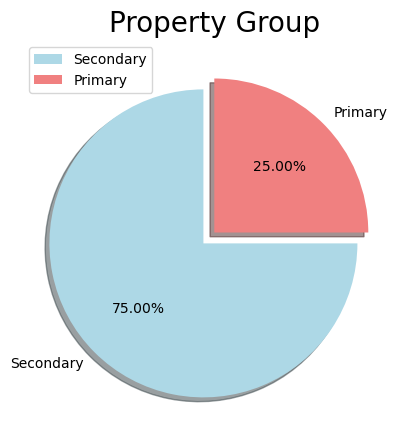

In [217]:
#Melihat presentase Property Group pada data

labels = ['Secondary', 'Primary']
size = df11['Group'].value_counts()
colors = ['lightblue', 'lightcoral'][:len(labels)]
explode = [0.1, 0]

fig, axes = plt.subplots(figsize=(6, 5))
plt.pie(size, colors = colors, explode = explode,
        labels = labels, shadow = True, startangle = 90, autopct = '%.2f%%')
plt.title('Property Group', fontsize = 20)
plt.legend()
plt.show()

#### A.2 Analys Balikpapan_clean

In [220]:
# Melihat statistik deskriptif dari variabel-variabel numerik
df22.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,403.0,2.309171e+09,2.422923e+09,380000000.0,1.000000e+09,1.615000e+09,2.650000e+09,2.500000e+10
Luas Bangunan,403.0,1.844841e+02,1.518437e+02,36.0,9.250000e+01,1.450000e+02,2.365000e+02,1.600000e+03
Luas Tanah,403.0,2.408065e+02,2.892736e+02,36.0,1.200000e+02,1.650000e+02,2.480000e+02,4.300000e+03


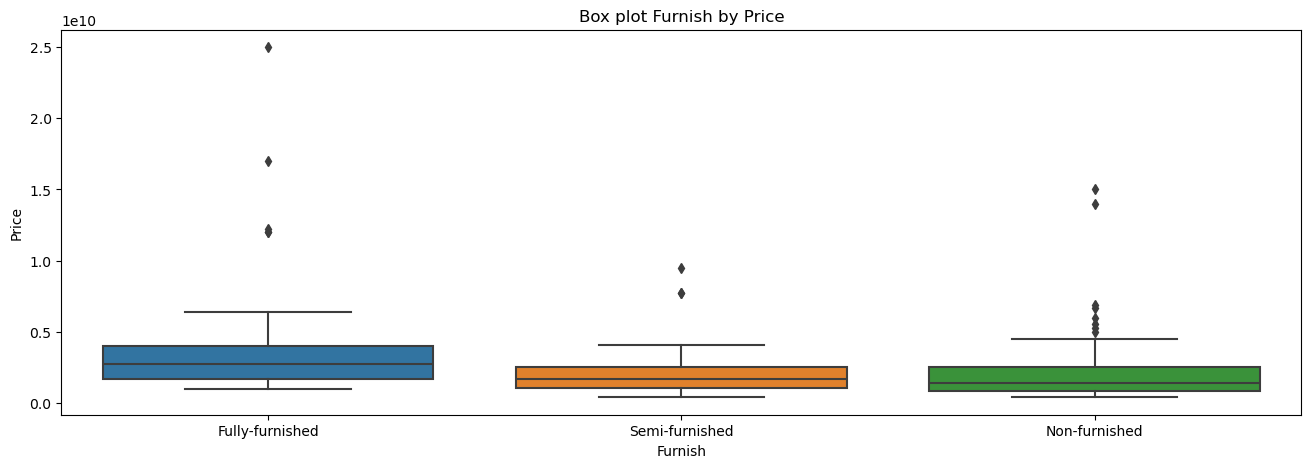

In [221]:
plt.figure(figsize=(16,5))
sns.boxplot(x='Furnish', y='Price', data=df22)
plt.title('Box plot Furnish by Price')
plt.show()

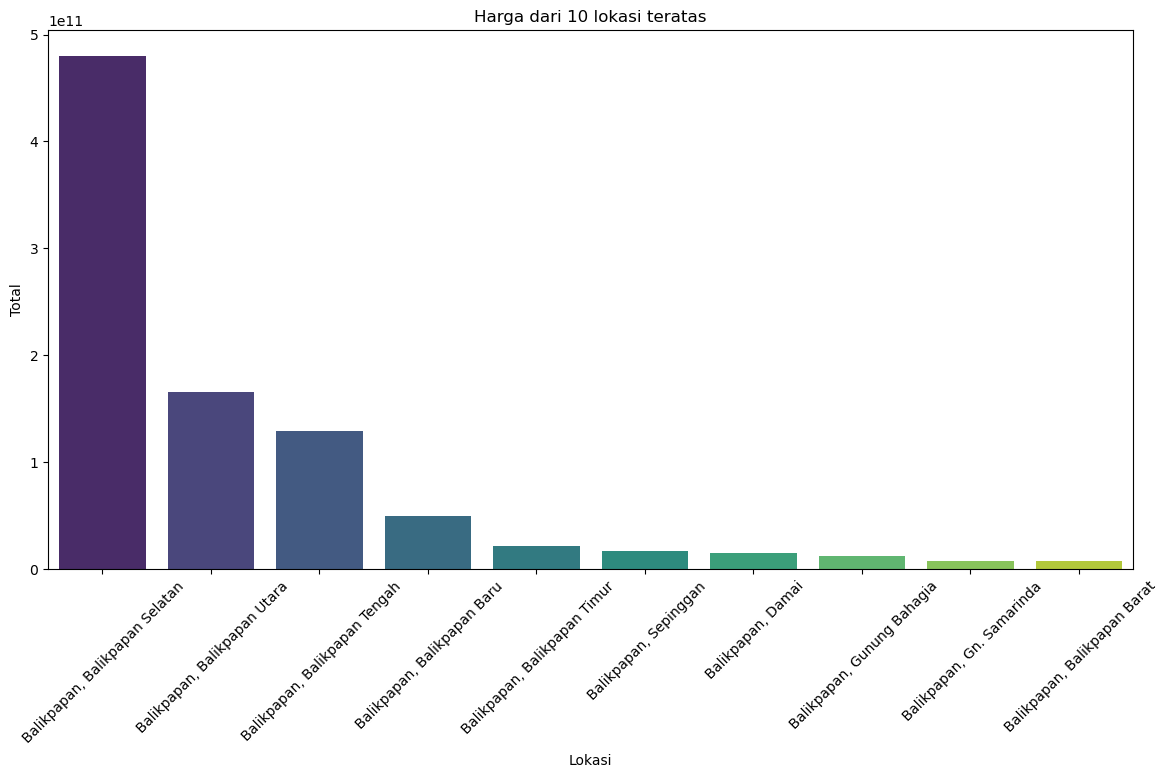

In [226]:
# Mengelompokkan data berdasarkan product_id dan menghitung total penjualan
price_lokasi = df22.groupby('Lokasi')['Price'].sum().reset_index()

# Mengurutkan produk berdasarkan total penjualan dan memilih 10 produk teratas
top_10_lokasi = price_lokasi.sort_values(by='Price', ascending=False).head(10)

# Membuat diagram batang untuk total penjualan 10 produk teratas
plt.figure(figsize=(14, 7))
sns.barplot(x='Lokasi', y='Price', data=top_10_lokasi, palette='viridis')
plt.title('Harga dari 10 lokasi teratas')
plt.xlabel('Lokasi')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.show()

In [231]:
df22['Group'].value_counts()

Group
Secondary    286
Primary       18
Name: count, dtype: int64

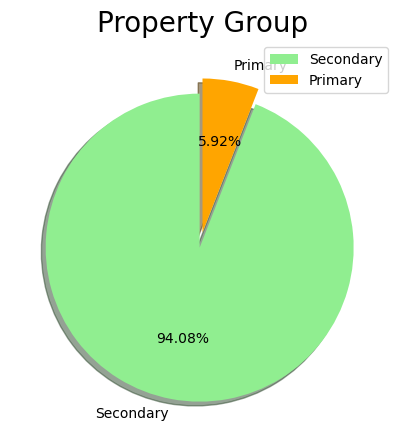

In [230]:
#Melihat presentase Property Group pada data

labels = ['Secondary', 'Primary']
size = df22['Group'].value_counts()
colors = ['lightgreen', 'Orange'][:len(labels)]
explode = [0.1, 0]

fig, axes = plt.subplots(figsize=(6, 5))
plt.pie(size, colors = colors, explode = explode,
        labels = labels, shadow = True, startangle = 90, autopct = '%.2f%%')
plt.title('Property Group', fontsize = 20)
plt.legend()
plt.show()

# V. Feature Engineering

# VI. Model Definition

# VII. Model Training

# VIII. Model Evaluation

# IX. Model Saving

# X. Model Inference